# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman.

### import modules

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from ipywidgets import interact

#### set defaults

In [2]:
sns.set_context('poster')
sns.set_style('ticks')

### load data

In [3]:
dataset = '../data/feelingOld.csv'

In [4]:
dataset

'../data/feelingOld.csv'

In [5]:
df = pd.read_csv (dataset)

In [6]:
df.tail()

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0


### clean up

In [7]:
clean_df = df.drop('Consent',axis=1)
clean_df.loc[:,'gender'] = [['male', 'female']['fem' in x.lower()] for x in clean_df.loc[:, 'gender']]

In [8]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild
190,5,50,80,23,female,1
191,4,50,60,49,male,2
192,3,70,100,55,female,5
193,5,69,80,69,male,3
194,5,40,60,41,male,0


### transform

In [9]:
age_bins = list(range(10,90,10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [10]:
clean_df.loc[:,'ageBin'] = pd.cut(clean_df.loc[:,'age'],bins=age_bins)

In [11]:
clean_df.loc[:,'oldBeginBin'] = pd.cut(clean_df.loc[:,'oldBegin'],bins=age_bins)

In [12]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin
190,5,50,80,23,female,1,"(20, 30]","(40, 50]"
191,4,50,60,49,male,2,"(40, 50]","(40, 50]"
192,3,70,100,55,female,5,"(50, 60]","(60, 70]"
193,5,69,80,69,male,3,"(60, 70]","(60, 70]"
194,5,40,60,41,male,0,"(40, 50]","(30, 40]"


In [13]:
count_df = clean_df.groupby('ageBin').count()
count_df.loc[:,'ageBin'] = count_df.index

In [14]:
count_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,oldBeginBin,ageBin
ageBin,,,,,,,,
"(30, 40]",61,61,61,61,61,61,61,"(30, 40]"
"(40, 50]",29,29,29,29,29,29,29,"(40, 50]"
"(50, 60]",22,22,22,22,22,22,22,"(50, 60]"
"(60, 70]",6,6,6,6,6,6,6,"(60, 70]"
"(70, 80]",3,3,3,3,3,3,3,"(70, 80]"


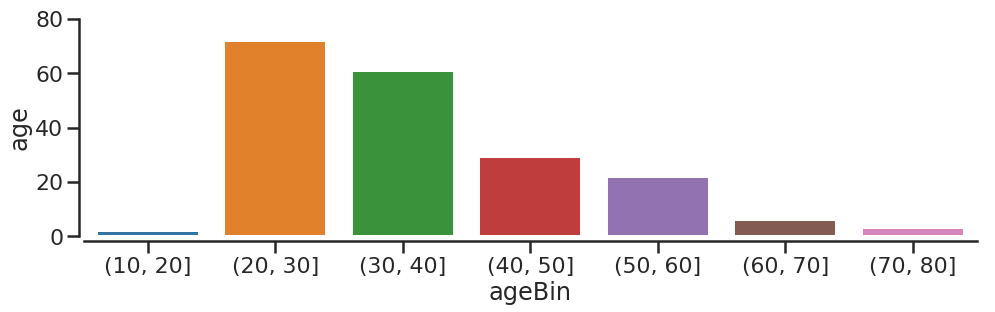

In [15]:
plt.figure(figsize=(16,4))
sns.barplot(data=count_df,x='ageBin',y='age')
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

## explore

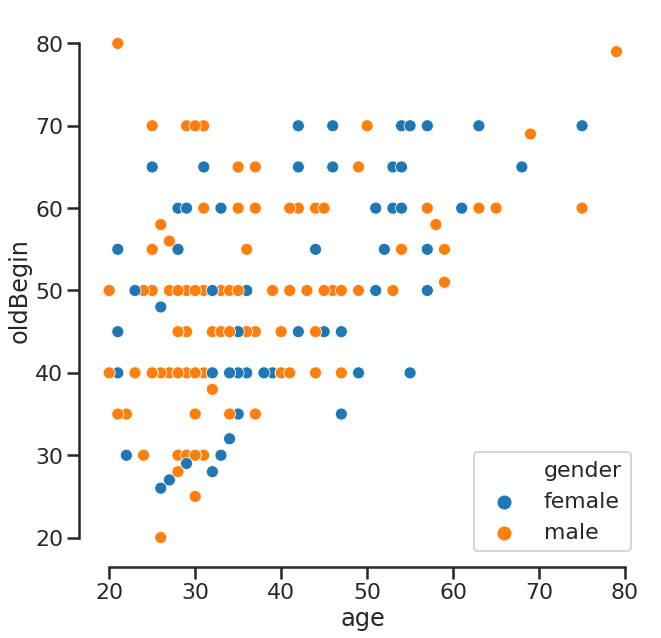

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=clean_df,x='age',y='oldBegin',hue='gender')
sns.despine(trim=True,offset=5)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


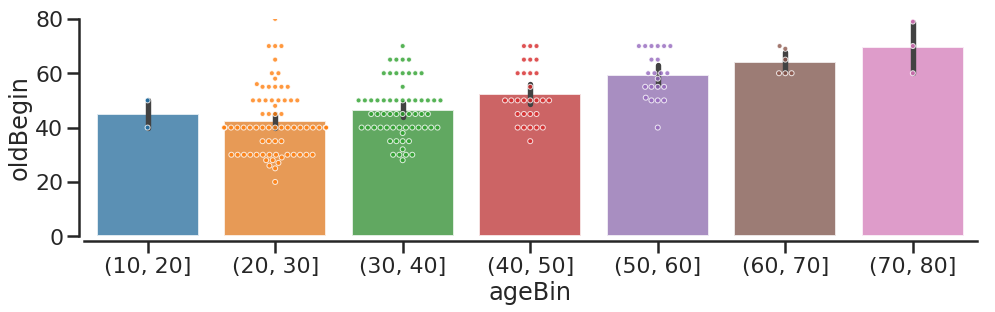

In [17]:
plt.figure(figsize=(16,4))
sns.barplot(data=clean_df,x='ageBin',y='oldBegin',alpha=0.8)
sns.swarmplot(data=clean_df,x='ageBin',y='oldBegin',linewidth=1,edgecolor='white',alpha=0.8)
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


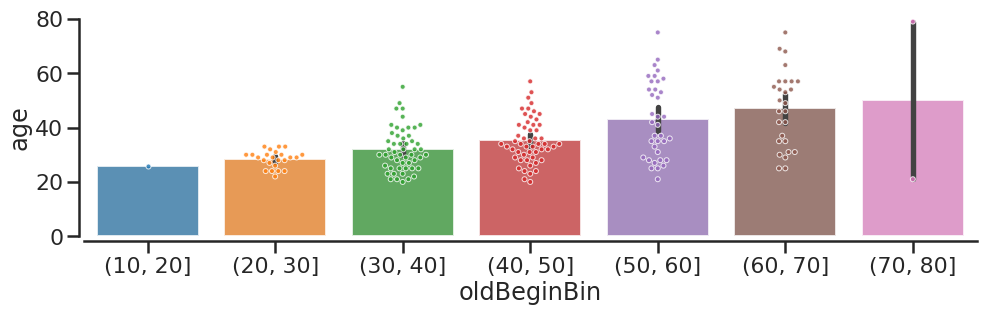

In [18]:
plt.figure(figsize=(16,4))
sns.barplot(data=clean_df,x='oldBeginBin',y='age',alpha=0.8)
sns.swarmplot(data=clean_df,x='oldBeginBin',y='age',linewidth=1,edgecolor='white',alpha=0.8)
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

## model

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


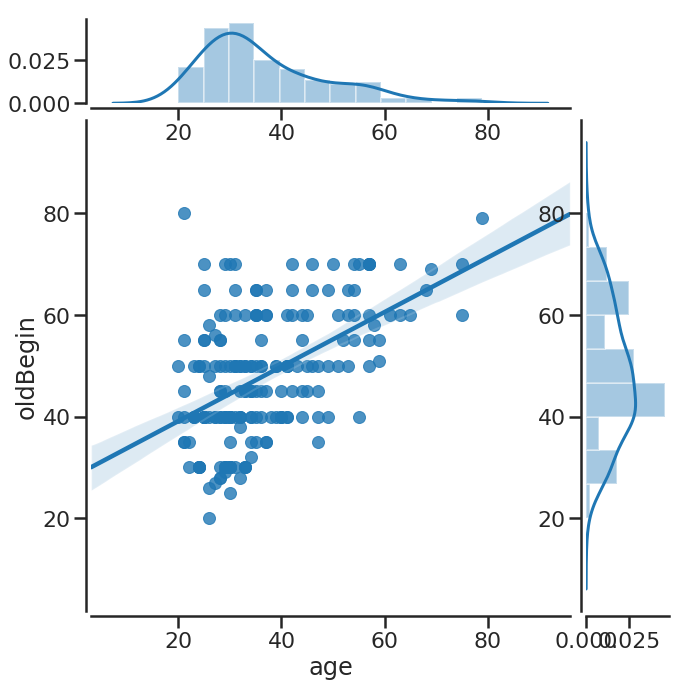

In [19]:
sns.jointplot("age", "oldBegin", data=clean_df, kind="reg",size=10)
sns.despine(offset=5)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


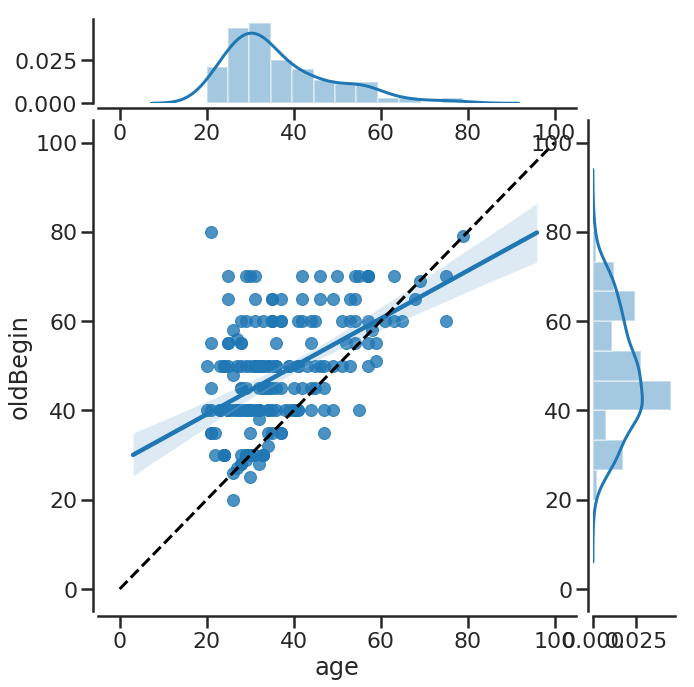

In [20]:
sns.jointplot("age", "oldBegin", data=clean_df, kind="reg",size=10)
sns.despine(offset=5)
plt.plot([0,100],[0,100],linestyle='dashed',color='k')
plt.show()

### Fit linear regression line

In [21]:
def linear(x,a,b):
    y = a+b*x
    return y

In [22]:
def fitFunc(x,y,func):
    (intercept,slope), pcov = curve_fit(func, x, y)
    return intercept,slope

In [23]:
x = clean_df.loc[:,'age']
y = clean_df.loc[:,'oldBegin']

In [24]:
intercept,slope=fitFunc(x,y,linear)

In [25]:
intercept,slope

(28.39384224910524, 0.5361851416230833)

In [26]:
def plot_observer_func(x):
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    sns.regplot("age", "oldBegin", data=clean_df,ax=ax)

    a=intercept
    b=slope
    y = a+b*x   
    plt.plot(x,y,'o',label=r'$%.0f+%.2f*%.0f=%.0f$'%(a,b,x,y))
    
    plt.legend()    
    sns.despine(trim=True,offset=5)
    plt.show()
    return y

#### What age do 20-year old people consider "old"?

In [27]:
observer_age = 20

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


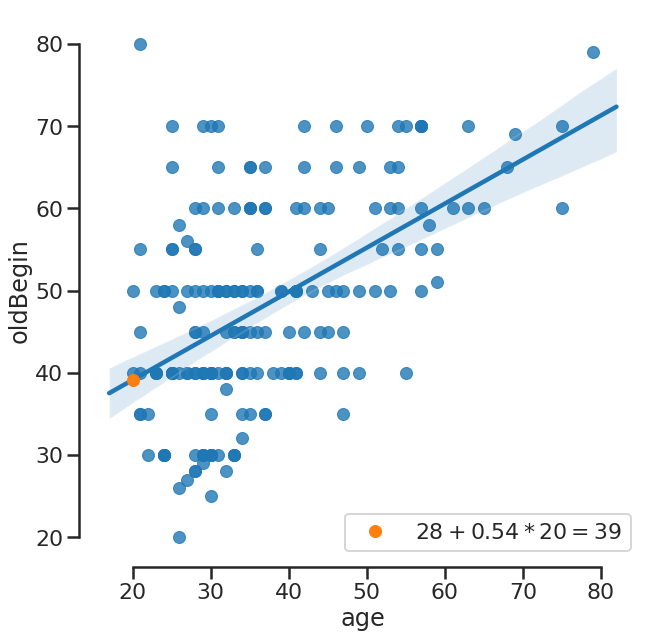

In [28]:
old_age_begin = plot_observer_func(observer_age)

Answer: {{ '%0.f'%observer_age }}-year old people consider {{ '%0.f'%old_age_begin }} and above to be "old" (on average)

In [29]:
i = interact(plot_observer_func,x=(1,90))

interactive(children=(IntSlider(value=45, description='x', max=90, min=1), Output()), _dom_classes=('widget-in…

In [30]:
def plot_observed_func(y):
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    sns.regplot("age", "oldBegin", data=clean_df,ax=ax)
    
    a=intercept
    b=slope
    
    x = (y-a)/b
    plt.plot(x,y,'o',label=r'$\frac{(%.0f-%.0f)}{%.2f}=%.0f$'%(y,a,b,x))

    plt.legend()
    sns.despine(trim=True,offset=5)
    plt.show()
    return x

#### Who considers 33 to be old (on average)?

In [31]:
observed_age = 33

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


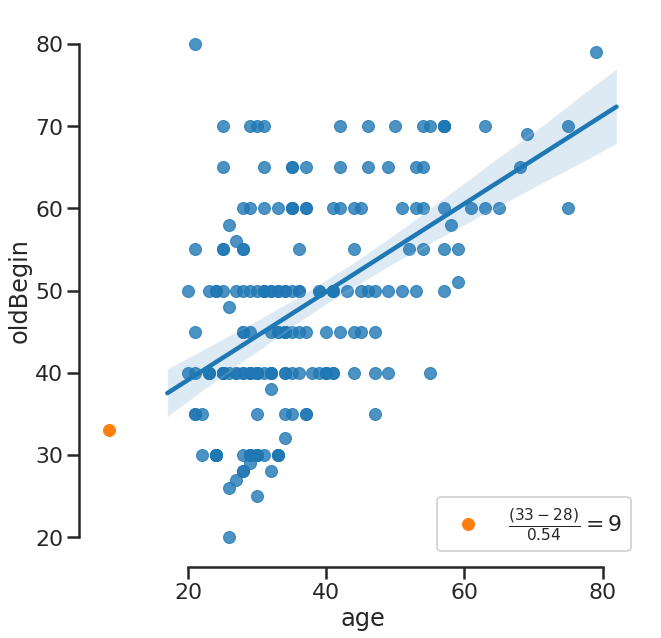

In [32]:
observer_say_old = plot_observed_func(observed_age)

Answer: {{ '%0.f'%observed_age }}-year old people are considered old by people {{ '%0.f'%observer_say_old }} and younger (on average).

In [33]:
i = interact(plot_observed_func,y=(10,90))

interactive(children=(IntSlider(value=50, description='y', max=90, min=10), Output()), _dom_classes=('widget-i…

### compare to identity

In [34]:
intercept,slope=fitFunc(x,y,linear)
intercept,slope

(28.39384224910524, 0.5361851416230833)

In [35]:
pred_df = pd.DataFrame( [[x,intercept+x*slope,x] for x in range(100)] )
pred_df.columns = ['age','predictBeginOld','identity']

In [36]:
pred_df.tail()

,age,predictBeginOld,identity
95,95,79.331431,95
96,96,79.867616,96
97,97,80.403801,97
98,98,80.939986,98
99,99,81.476171,99


In [37]:
pred_df.loc[:,'diff']=pred_df.loc[:,'predictBeginOld']-pred_df.loc[:,'identity']

In [38]:
pred_df.tail()

,age,predictBeginOld,identity,diff
95,95,79.331431,95,-15.668569
96,96,79.867616,96,-16.132384
97,97,80.403801,97,-16.596199
98,98,80.939986,98,-17.060014
99,99,81.476171,99,-17.523829


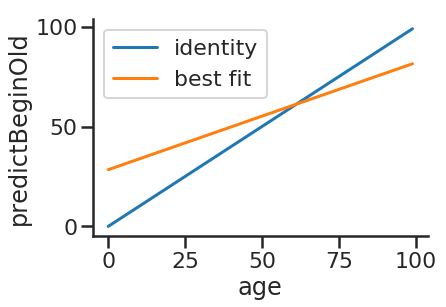

In [39]:
sns.lineplot(data=pred_df,x='age',y='identity',label='identity')
sns.lineplot(data=pred_df,x='age',y='predictBeginOld',label='best fit')

sns.despine()
plt.legend()
plt.show()

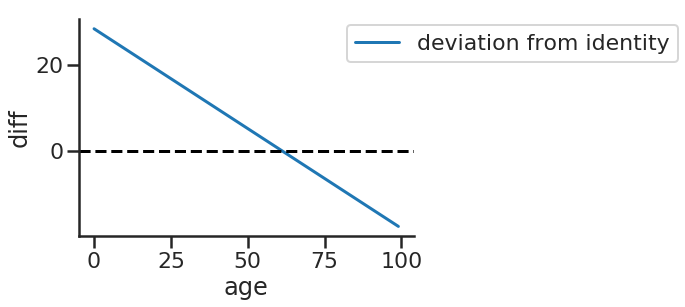

In [40]:
sns.lineplot(data=pred_df,x='age',y='diff',label='deviation from identity')
plt.legend(loc=(0.8,0.8))
plt.axhline(0,color='k',linestyle='dashed')
sns.despine()
plt.show()

In [41]:
clean_df.loc[:,'deviationFromIdentity'] = clean_df.loc[:,'oldBegin']-clean_df.loc[:,'age']

In [42]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin,deviationFromIdentity
190,5,50,80,23,female,1,"(20, 30]","(40, 50]",27
191,4,50,60,49,male,2,"(40, 50]","(40, 50]",1
192,3,70,100,55,female,5,"(50, 60]","(60, 70]",15
193,5,69,80,69,male,3,"(60, 70]","(60, 70]",0
194,5,40,60,41,male,0,"(40, 50]","(30, 40]",-1


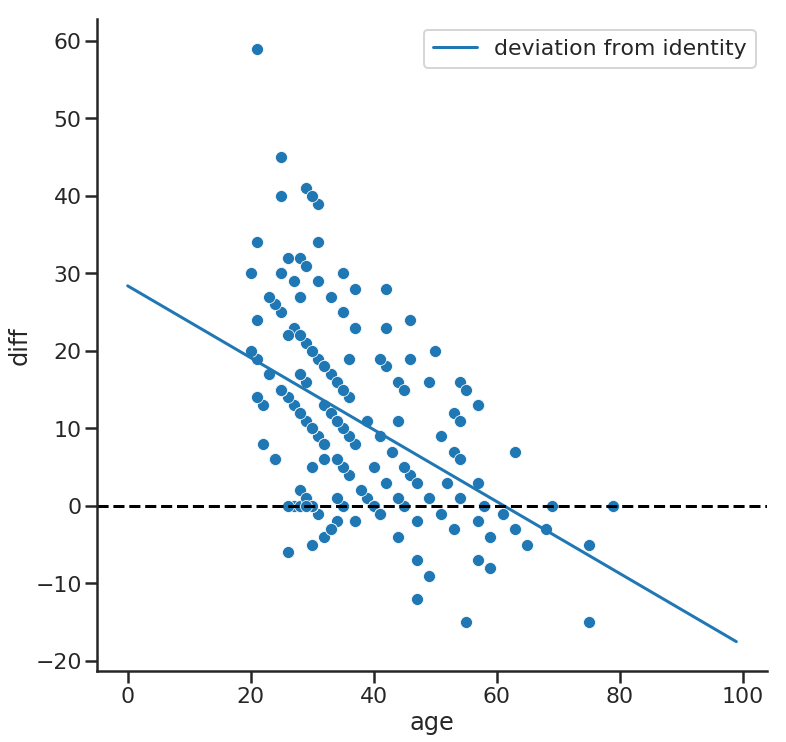

In [43]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=clean_df,x='age',y='deviationFromIdentity')
sns.lineplot(data=pred_df,x='age',y='diff',label='deviation from identity')
plt.axhline(0,color='k',linestyle='dashed')
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


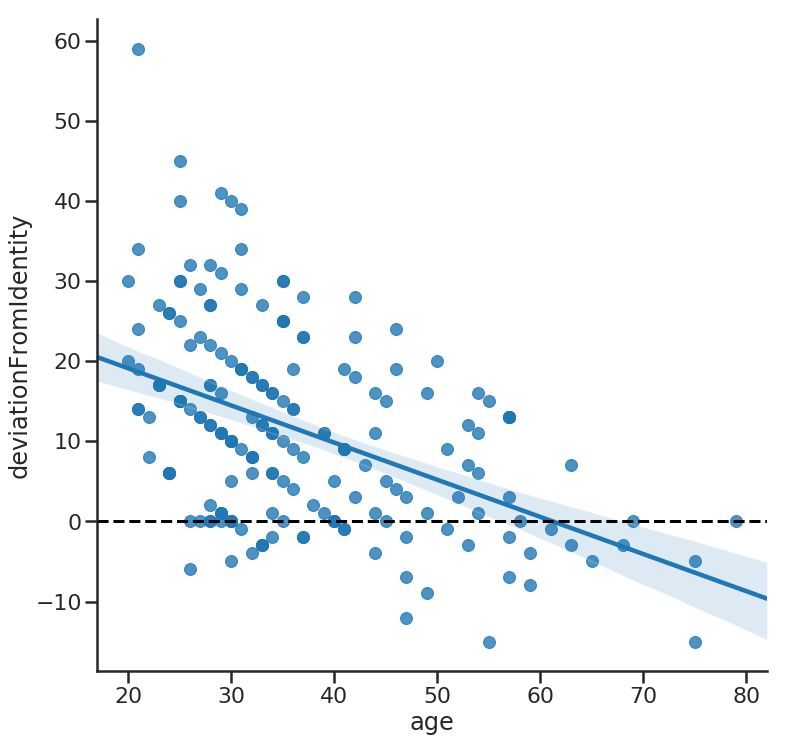

In [44]:
plt.figure(figsize=(12,12))
sns.regplot(data=clean_df,x='age',y='deviationFromIdentity')
plt.axhline(0,color='k',linestyle='dashed')
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


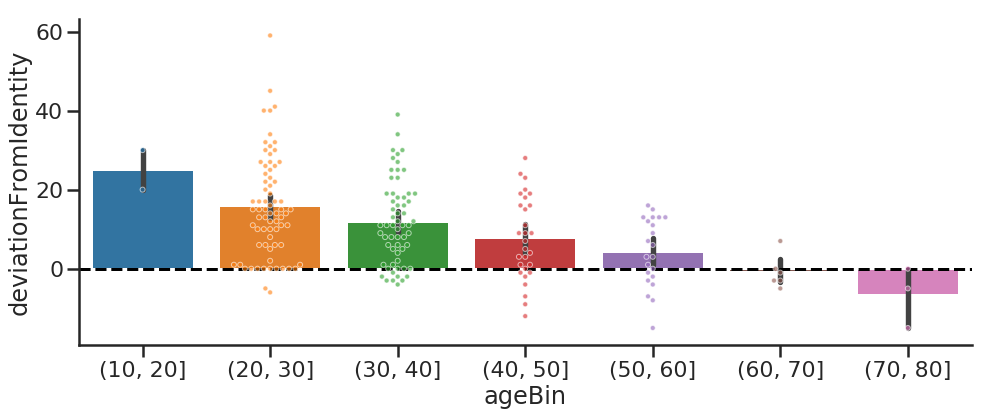

In [45]:
plt.figure(figsize=(16,6))
sns.barplot(data=clean_df,x='ageBin',y='deviationFromIdentity')
sns.swarmplot(data=clean_df,x='ageBin',y='deviationFromIdentity',edgecolor='white',linewidth=1,alpha=0.6)
plt.axhline(0,color='k',linestyle='dashed')
sns.despine()
plt.show()

In [46]:
x = clean_df.loc[:,'age']
y = clean_df.loc[:,'deviationFromIdentity']

In [47]:
intercept,slope=fitFunc(x,y,linear)
intercept,slope

(28.39384224910524, -0.4638148583790982)

In [48]:
def plot_deviation_age_func(x):
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    sns.regplot("age", "deviationFromIdentity", data=clean_df,ax=ax)

    a=intercept
    b=slope
    y = a+b*x   
    plt.plot(x,y,'o',label=r'$%.0f+%.2f*%.0f=%.0f$'%(a,b,x,y))
    
    plt.legend()    
    sns.despine(trim=True,offset=5)
    plt.show()
    return y

#### How much older than their own age do you have to be to be considered old by a 20-year old?

In [49]:
observer_age

20

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


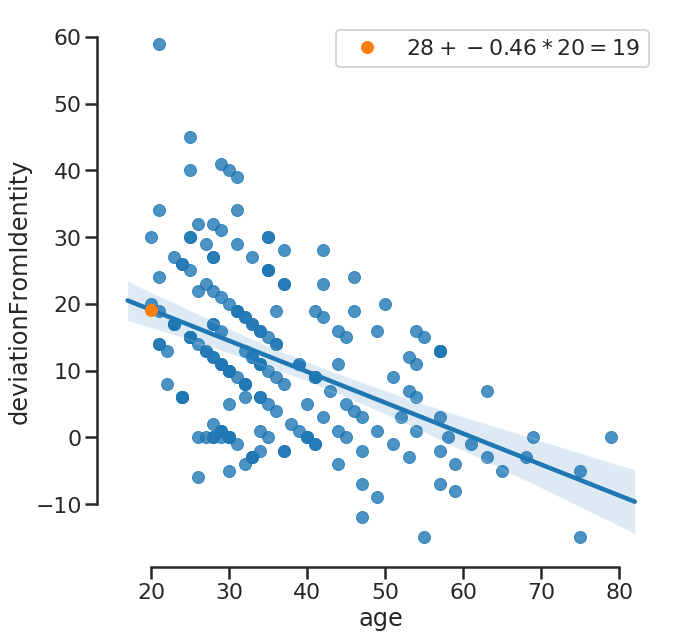

In [50]:
older_than_observer = plot_deviation_age_func(observer_age)

Answer: You have to be {{ '%0.f'%older_than_observer }} years older than the {{ '%0.f'%observer_age }}-year olds to be considered old.

In [51]:
def plot_deviation_mag_func(y):
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    sns.regplot("age", "deviationFromIdentity", data=clean_df,ax=ax)
    
    a=intercept
    b=slope
    
    x = (y-a)/b
    plt.plot(x,y,'o',label=r'$\frac{(%.0f-%.0f)}{%.2f}=%.0f$'%(y,a,b,x))

    plt.legend()
    sns.despine(trim=True,offset=5)
    plt.show()
    return x

#### Who considers people 19 years older than themselves to be old?

In [71]:
magnitude_of_deviation = 19

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


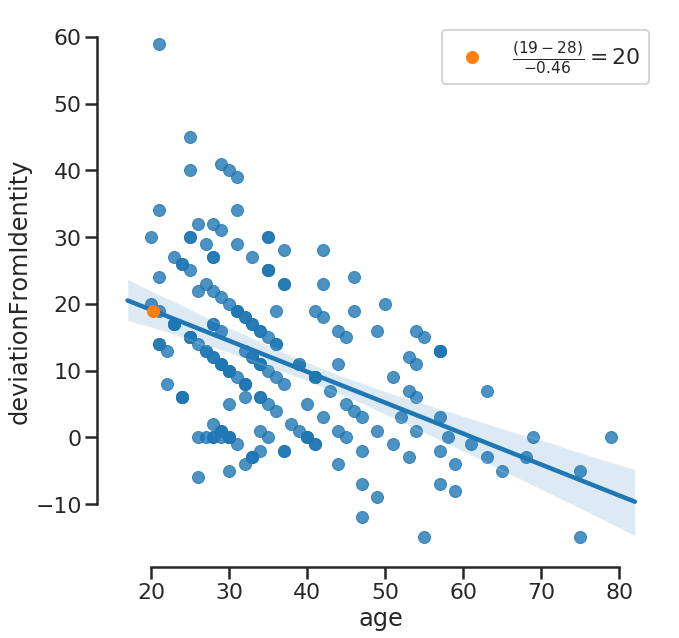

In [72]:
age_of_observer = plot_deviation_mag_func(magnitude_of_deviation)

Answer: {{ '%0.f'%age_of_observer }}-year olds consider people {{ '%0.f'%magnitude_of_deviation }} years older than themselves to be old.

## counting proportions

In [54]:
num_df = pd.DataFrame( clean_df.groupby(['ageBin','oldBeginBin']).count().loc[:,'age'] ).copy()

In [55]:
num_df

age
ageBin   oldBeginBin      
(10, 20] (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      1.0
         (40, 50]      1.0
         (50, 60]      NaN
         (60, 70]      NaN
         (70, 80]      NaN
(20, 30] (10, 20]      1.0
         (20, 30]     19.0
         (30, 40]     25.0
         (40, 50]     13.0
         (50, 60]      9.0
         (60, 70]      4.0
         (70, 80]      1.0
(30, 40] (10, 20]      NaN
         (20, 30]      5.0
         (30, 40]     19.0
         (40, 50]     24.0
         (50, 60]      8.0
         (60, 70]      5.0
         (70, 80]      NaN
(40, 50] (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      6.0
         (40, 50]     12.0
         (50, 60]      5.0
         (60, 70]      6.0
         (70, 80]      NaN
(50, 60] (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      1.0
         (40, 50]      3.0
         (50, 60]     10.0
         (60, 70]      8.0
         (70, 80]      NaN
(60, 70] (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      NaN
         (40, 50]      NaN
         (50, 60]      3.0
         (60, 70]      3.0
         (70, 80]      NaN
(70, 80] (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      NaN
         (40, 50]      NaN
         (50, 60]      1.0
         (60, 70]      1.0
         (70, 80]      1.0

In [56]:
num_df = num_df.unstack().T.loc['age',:]

In [57]:
num_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",NaN,1.0,NaN,NaN,NaN,NaN,NaN
"(20, 30]",NaN,19.0,5.0,NaN,NaN,NaN,NaN
"(30, 40]",1.0,25.0,19.0,6.0,1.0,NaN,NaN
"(40, 50]",1.0,13.0,24.0,12.0,3.0,NaN,NaN
"(50, 60]",NaN,9.0,8.0,5.0,10.0,3.0,1.0
"(60, 70]",NaN,4.0,5.0,6.0,8.0,3.0,1.0
"(70, 80]",NaN,1.0,NaN,NaN,NaN,NaN,1.0


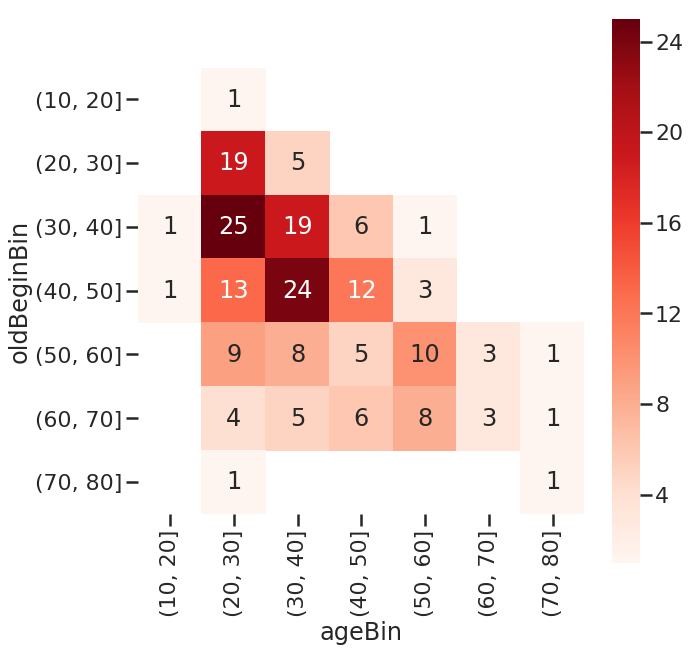

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df,square=True,annot=True,cmap='Reds')
plt.show()

In [59]:
num_df.sum(axis=0)

ageBin
(10, 20]     2.0
(20, 30]    72.0
(30, 40]    61.0
(40, 50]    29.0
(50, 60]    22.0
(60, 70]     6.0
(70, 80]     3.0
dtype: float64

In [60]:
percent_df = ((num_df/num_df.sum(axis=0)) * 100).T.copy()

In [61]:
percent_df

oldBeginBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ageBin,,,,,,,
"(10, 20]",NaN,NaN,50.000000,50.000000,NaN,NaN,NaN
"(20, 30]",1.388889,26.388889,34.722222,18.055556,12.500000,5.555556,1.388889
"(30, 40]",NaN,8.196721,31.147541,39.344262,13.114754,8.196721,NaN
"(40, 50]",NaN,NaN,20.689655,41.379310,17.241379,20.689655,NaN
"(50, 60]",NaN,NaN,4.545455,13.636364,45.454545,36.363636,NaN
"(60, 70]",NaN,NaN,NaN,NaN,50.000000,50.000000,NaN
"(70, 80]",NaN,NaN,NaN,NaN,33.333333,33.333333,33.333333


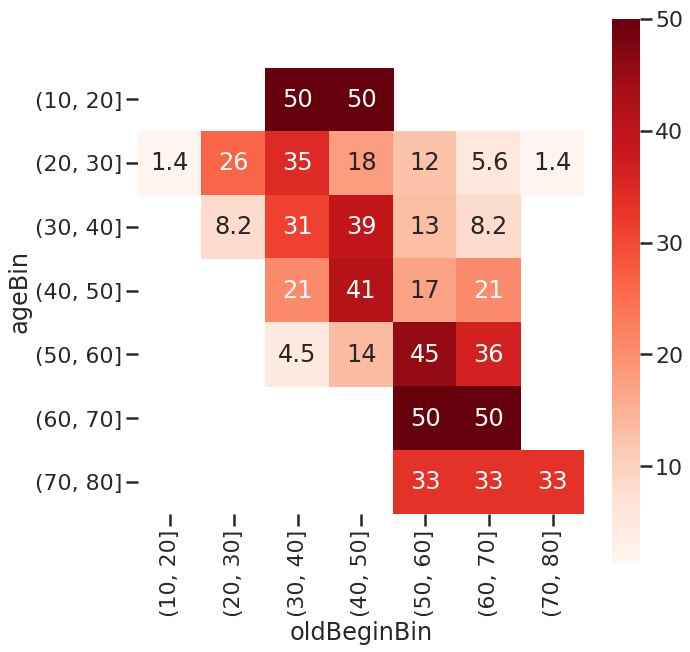

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(percent_df,square=True,annot=True,cmap='Reds')
plt.show()

In [63]:
percent_df

oldBeginBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ageBin,,,,,,,
"(10, 20]",NaN,NaN,50.000000,50.000000,NaN,NaN,NaN
"(20, 30]",1.388889,26.388889,34.722222,18.055556,12.500000,5.555556,1.388889
"(30, 40]",NaN,8.196721,31.147541,39.344262,13.114754,8.196721,NaN
"(40, 50]",NaN,NaN,20.689655,41.379310,17.241379,20.689655,NaN
"(50, 60]",NaN,NaN,4.545455,13.636364,45.454545,36.363636,NaN
"(60, 70]",NaN,NaN,NaN,NaN,50.000000,50.000000,NaN
"(70, 80]",NaN,NaN,NaN,NaN,33.333333,33.333333,33.333333


In [64]:
cum_percent_df = percent_df.fillna(0).cumsum(axis=1).T.copy()

In [65]:
cum_percent_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",0.0,1.388889,0.000000,0.000000,0.000000,0.0,0.000000
"(20, 30]",0.0,27.777778,8.196721,0.000000,0.000000,0.0,0.000000
"(30, 40]",50.0,62.500000,39.344262,20.689655,4.545455,0.0,0.000000
"(40, 50]",100.0,80.555556,78.688525,62.068966,18.181818,0.0,0.000000
"(50, 60]",100.0,93.055556,91.803279,79.310345,63.636364,50.0,33.333333
"(60, 70]",100.0,98.611111,100.000000,100.000000,100.000000,100.0,66.666667
"(70, 80]",100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000


In [66]:
round_df = np.round(cum_percent_df,0).astype(int)
round_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",0,1,0,0,0,0,0
"(20, 30]",0,28,8,0,0,0,0
"(30, 40]",50,62,39,21,5,0,0
"(40, 50]",100,81,79,62,18,0,0
"(50, 60]",100,93,92,79,64,50,33
"(60, 70]",100,99,100,100,100,100,67
"(70, 80]",100,100,100,100,100,100,100


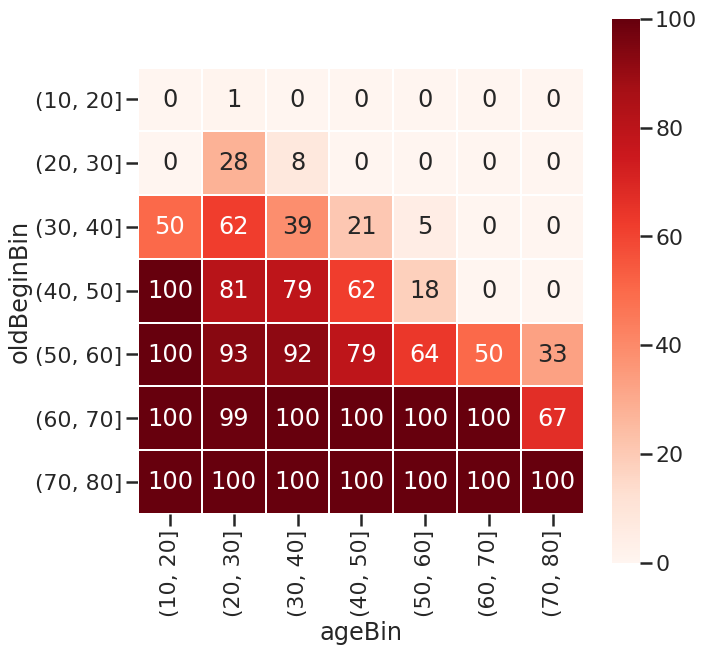

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(
    round_df,
    square=True,
    annot=True,
    cmap='Reds',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    ax=ax)

plt.show()

In [68]:
round_df.index = ['%s-%syrs'%(x.left,x.right) for x in round_df.index]
round_df.columns = ['%s-%syrs'%(x.left,x.right) for x in round_df.columns]

round_df.index.names = ['your age']
round_df.columns.names = ['age of people rating you']

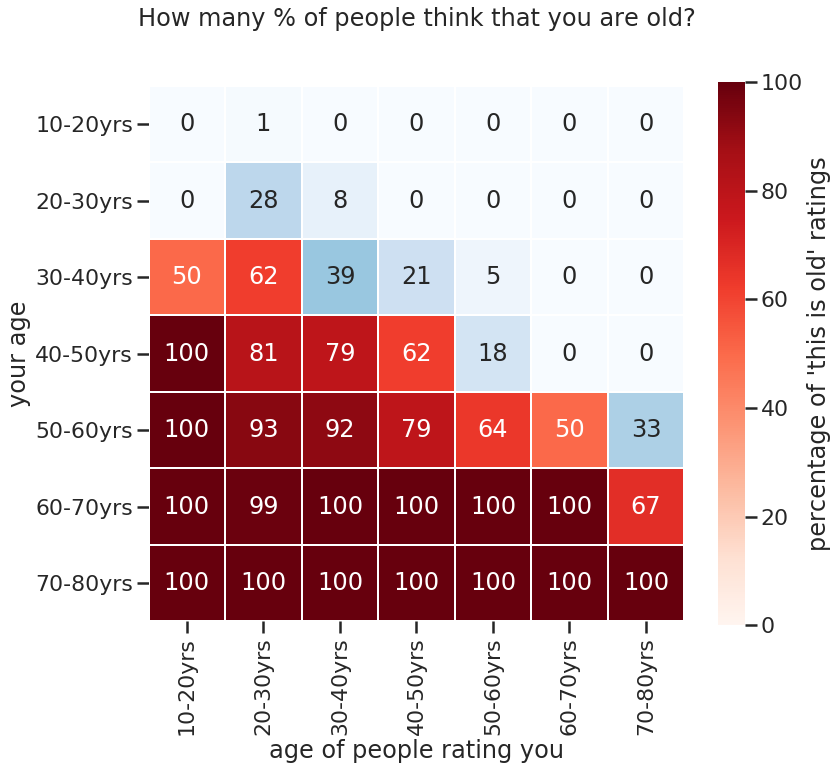

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(
    round_df[round_df>=50],
    square=True,
    annot=True,
    cmap='Reds',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    cbar_kws={"label":"percentage of 'this is old' ratings"},
    ax=ax)

sns.heatmap(
    round_df[round_df<50],
    square=True,
    annot=True,
    cmap='Blues',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    cbar=False,
    ax=ax)


plt.title('How many % of people think that you are old?',fontsize=24,y=1.1)
plt.show()

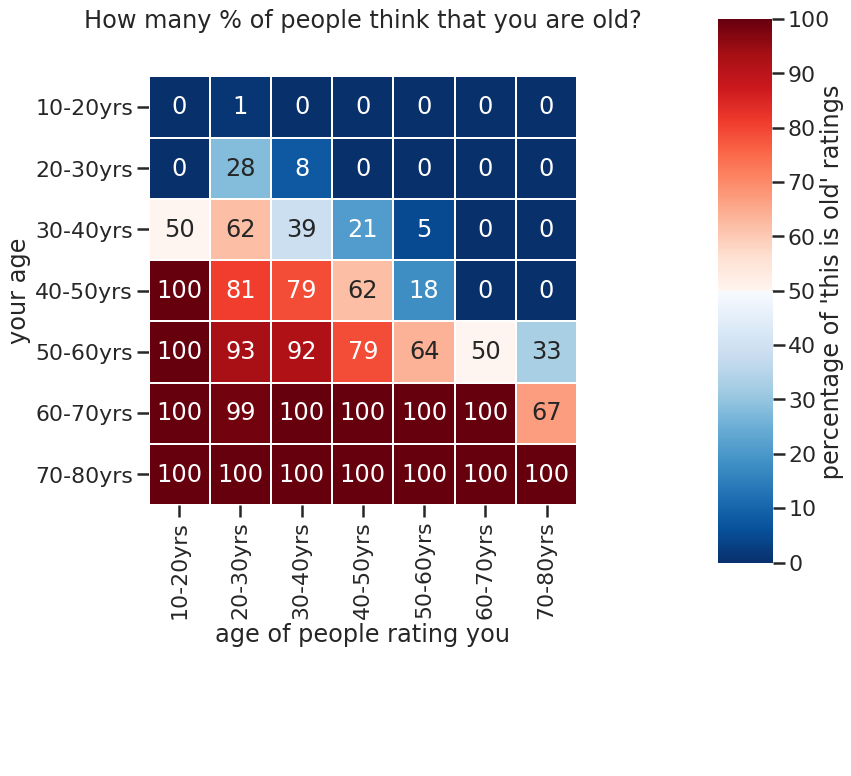

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(
    round_df[round_df>=50],
    square=True,
    annot=True,
    cmap='Reds',
    vmin=50,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    
    cbar_kws={
            "aspect": 5,
            "shrink": 0.5,
            #'format': '%.2f',
            'use_gridspec': False,
            'anchor': (0., 1.0),
            #'ticks': np.linspace(50,101,10),
            },
    ax=ax)

sns.heatmap(
    round_df[round_df<50],
    square=True,
    annot=True,
    cmap='Blues_r',
    vmin=0,
    vmax=50,
    linewidths=1,
    fmt='.3g',
    cbar_kws={
            "aspect": 5,
            "shrink": 0.5,
            #'format': '%.2f',
            'use_gridspec': False,
            'anchor': (4.4, 0.),
            'ticks': range(0,50,10),
            'label':u"                                      percentage of 'this is old' ratings"
        },
    ax=ax)


plt.title('How many % of people think that you are old?',fontsize=24,y=1.1)
plt.show()